In [1]:
#!/usr/bin/env python
# coding: utf-8

# # Make a [tonic](https://tonic.readthedocs.io/en/latest/) dataset - see [documentation](https://tonic.readthedocs.io/en/latest/tutorials/wrapping_own_data.html)
# ## Example with the RGB frames dataset provided by NTUA, translated by UCA into events using vid2e

from dataset_creation_aprovis3d import aprovis3dDataset
from hots.utils import get_dataset_info
from os import walk, path
import numpy as np
import matplotlib.pyplot as plt

# path where you'll go to find your .npy files to make the dataset with
### TO BE MODIFIED
# path = '../../Data/DVS128_ZED_NUC_jAER/'
data_path = '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/'

/home/amelie/VirtualEnvironments/HOTS/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
event_files = []
for (rep_path, _, files) in walk(data_path):
    for f in files: 
        if f.endswith('.npy') and not f.endswith('cut.npy'):
            event_files.append(path.join(rep_path, f))
print(event_files)

['/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_5_only_ground/DVS128_06_06_2022_session_5.npy', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_4_only_sea/DVS128_06_06_2022_session_4.npy', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_3_only_ground/DVS128_06_06_2022_session_3.npy', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_6_only_sea/DVS128_06_06_2022_session_6.npy', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_2_only_sea/DVS128_06_06_2022_session_2.npy', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_1_only_ground/DVS128_06_06_2022_session_1.npy']


In [3]:
# load data
ev = {'session '+file_ev[-5]: np.load(file_ev) for file_ev in event_files}
label = {'session '+file_ev[-5]: 'sea' if 'sea' in file_ev else 'ground' for file_ev in event_files}
print(ev.keys())
print(label)

dtype = np.dtype([("x", int), ("y", int), ("t", int), ("p", int)])
ordering = dtype.names

dict_keys(['session 5', 'session 4', 'session 3', 'session 6', 'session 2', 'session 1'])
{'session 5': 'ground', 'session 4': 'sea', 'session 3': 'ground', 'session 6': 'sea', 'session 2': 'sea', 'session 1': 'ground'}


# Display event repartition

In [4]:
for ev_session, ev_data in ev.items():
    min_ts = np.min(ev_data[:,ordering.index('t')])
    max_ts = np.max(ev_data[:,ordering.index('t')])
    print('>',ev_session)
    print('Min timestamps:', min_ts)
    print('Max timestamps:', max_ts)

> session 5
Min timestamps: 0
Max timestamps: 392226858
> session 4
Min timestamps: 0
Max timestamps: 250666280
> session 3
Min timestamps: 0
Max timestamps: 249250294
> session 6
Min timestamps: 0
Max timestamps: 106799566
> session 2
Min timestamps: 0
Max timestamps: 182615916
> session 1
Min timestamps: 0
Max timestamps: 287532613


## Patch duration = $1s$

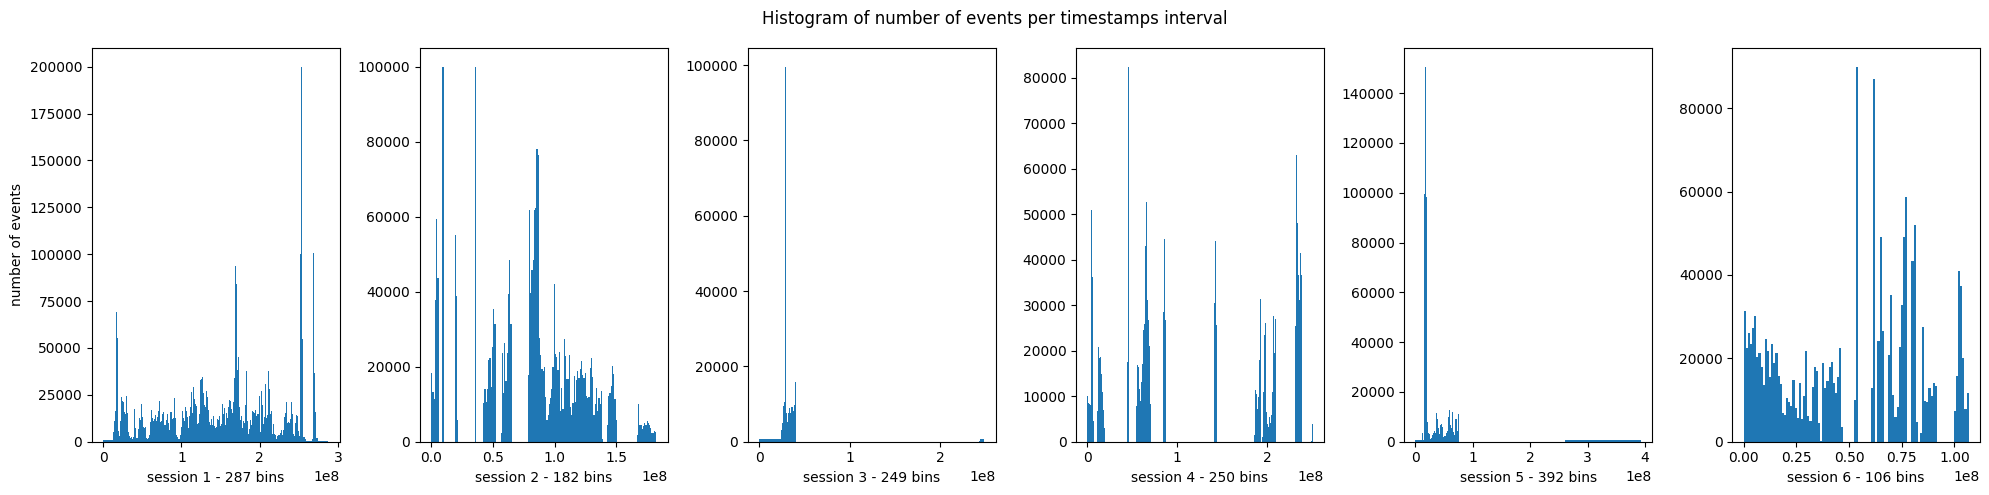

In [12]:
fig, ax = plt.subplots(1,len(ev.keys()),figsize=(20,5))
ax[0].set_ylabel('number of events')
for ev_session, ev_data in ev.items():
    frame_bin=int(max(ev_data[:,ordering.index('t')])/1e6)
    idx = int(ev_session[-1])-1
    ax[idx].set_xlabel(ev_session + ' - ' + str(frame_bin)+' bins')
    ax[idx].hist(ev_data[:, ordering.index('t')], bins=frame_bin)
fig.suptitle('Histogram of number of events per timestamps interval')
fig.tight_layout()

In [6]:
nb_events_per_bin = {}
for ev_session, ev_data in ev.items():
    nb_events_per_bin[ev_session] = np.histogram(
        ev_data[:, ordering.index("t")],
        bins = range(int(min_ts), int(max_ts), int(1e6))
    )[0]
    
    print('>', ev_session)
    print('Number of bins:',len(nb_events_per_bin[ev_session]))
    print('Empty bins in patchs of 1s:', list(nb_events_per_bin[ev_session]).count(0))
    print('Max nb of events per bin:',max(nb_events_per_bin[ev_session]))

> session 5
Number of bins: 287
Empty bins in patchs of 1s: 185
Max nb of events per bin: 144964
> session 4
Number of bins: 287
Empty bins in patchs of 1s: 212
Max nb of events per bin: 93567
> session 3
Number of bins: 287
Empty bins in patchs of 1s: 240
Max nb of events per bin: 99512
> session 6
Number of bins: 287
Empty bins in patchs of 1s: 205
Max nb of events per bin: 91589
> session 2
Number of bins: 287
Empty bins in patchs of 1s: 171
Max nb of events per bin: 100000
> session 1
Number of bins: 287
Empty bins in patchs of 1s: 1
Max nb of events per bin: 165071


Text(0.5, 0.98, 'Repartition of number of events per timestamps interval - with 0')

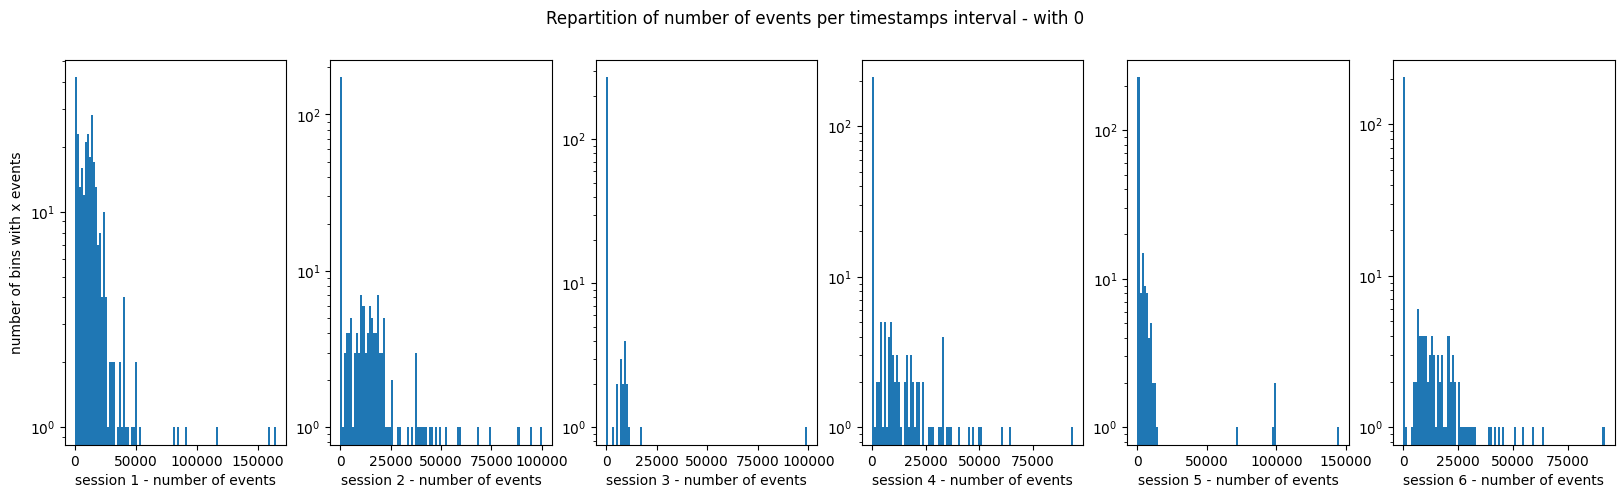

In [7]:
fig, ax = plt.subplots(1,len(ev.keys()),figsize=(20,5))
ax[0].set_ylabel('number of bins with x events')
for ev_session, ev_data in ev.items():
    idx = int(ev_session[-1])-1
    ax[idx].set_yscale('log')
    ax[idx].set_xlabel(ev_session + ' - number of events')
    ax[idx].hist(nb_events_per_bin[ev_session], bins=100)
plt.suptitle('Repartition of number of events per timestamps interval - with 0')

Text(0.5, 0.98, 'Repartition of number of events per timestamps interval - without 0')

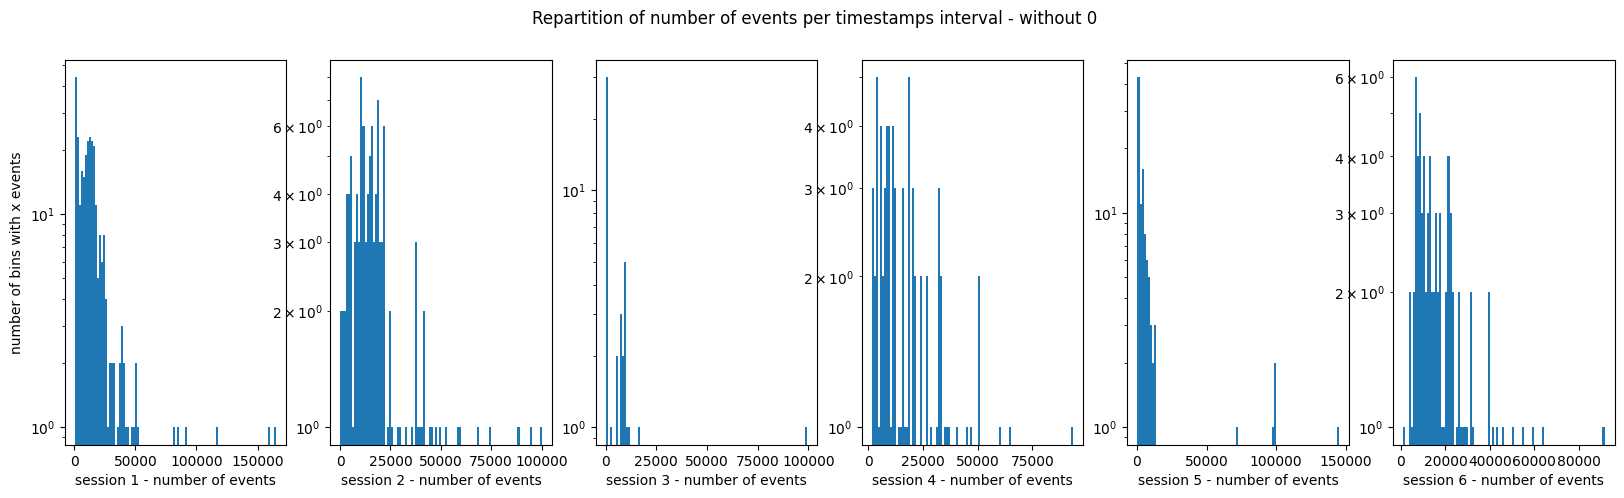

In [8]:
fig, ax = plt.subplots(1,len(ev.keys()),figsize=(20,5))
ax[0].set_ylabel('number of bins with x events')
for ev_session, ev_data in ev.items():
    idx = int(ev_session[-1])-1
    ax[idx].set_yscale('log')
    ax[idx].set_xlabel(ev_session + ' - number of events')
    ax[idx].hist(
        list(filter(lambda x: x != 0, nb_events_per_bin[ev_session])),
        bins=100
    )
plt.suptitle('Repartition of number of events per timestamps interval - without 0')

# Visualise frame

In [9]:
# timewindow = bin_frame
W = H = []

positive_ev = {}
negative_ev = {}

for ev_session, ev_data in ev.items():
    positive_ev[ev_session] = ev_data[ ev_data[:,ordering.index('p')] > 0 ]
    negative_ev[ev_session] = ev_data[ ev_data[:,ordering.index('p')] < 1 ]
    W.append(np.max(ev_data[:,ordering.index('x')]))
    H.append(np.max(ev_data[:,ordering.index('y')]))
W = max(W)
H = max(H)
print('sensor size:',W,H)

sensor size: 127 127


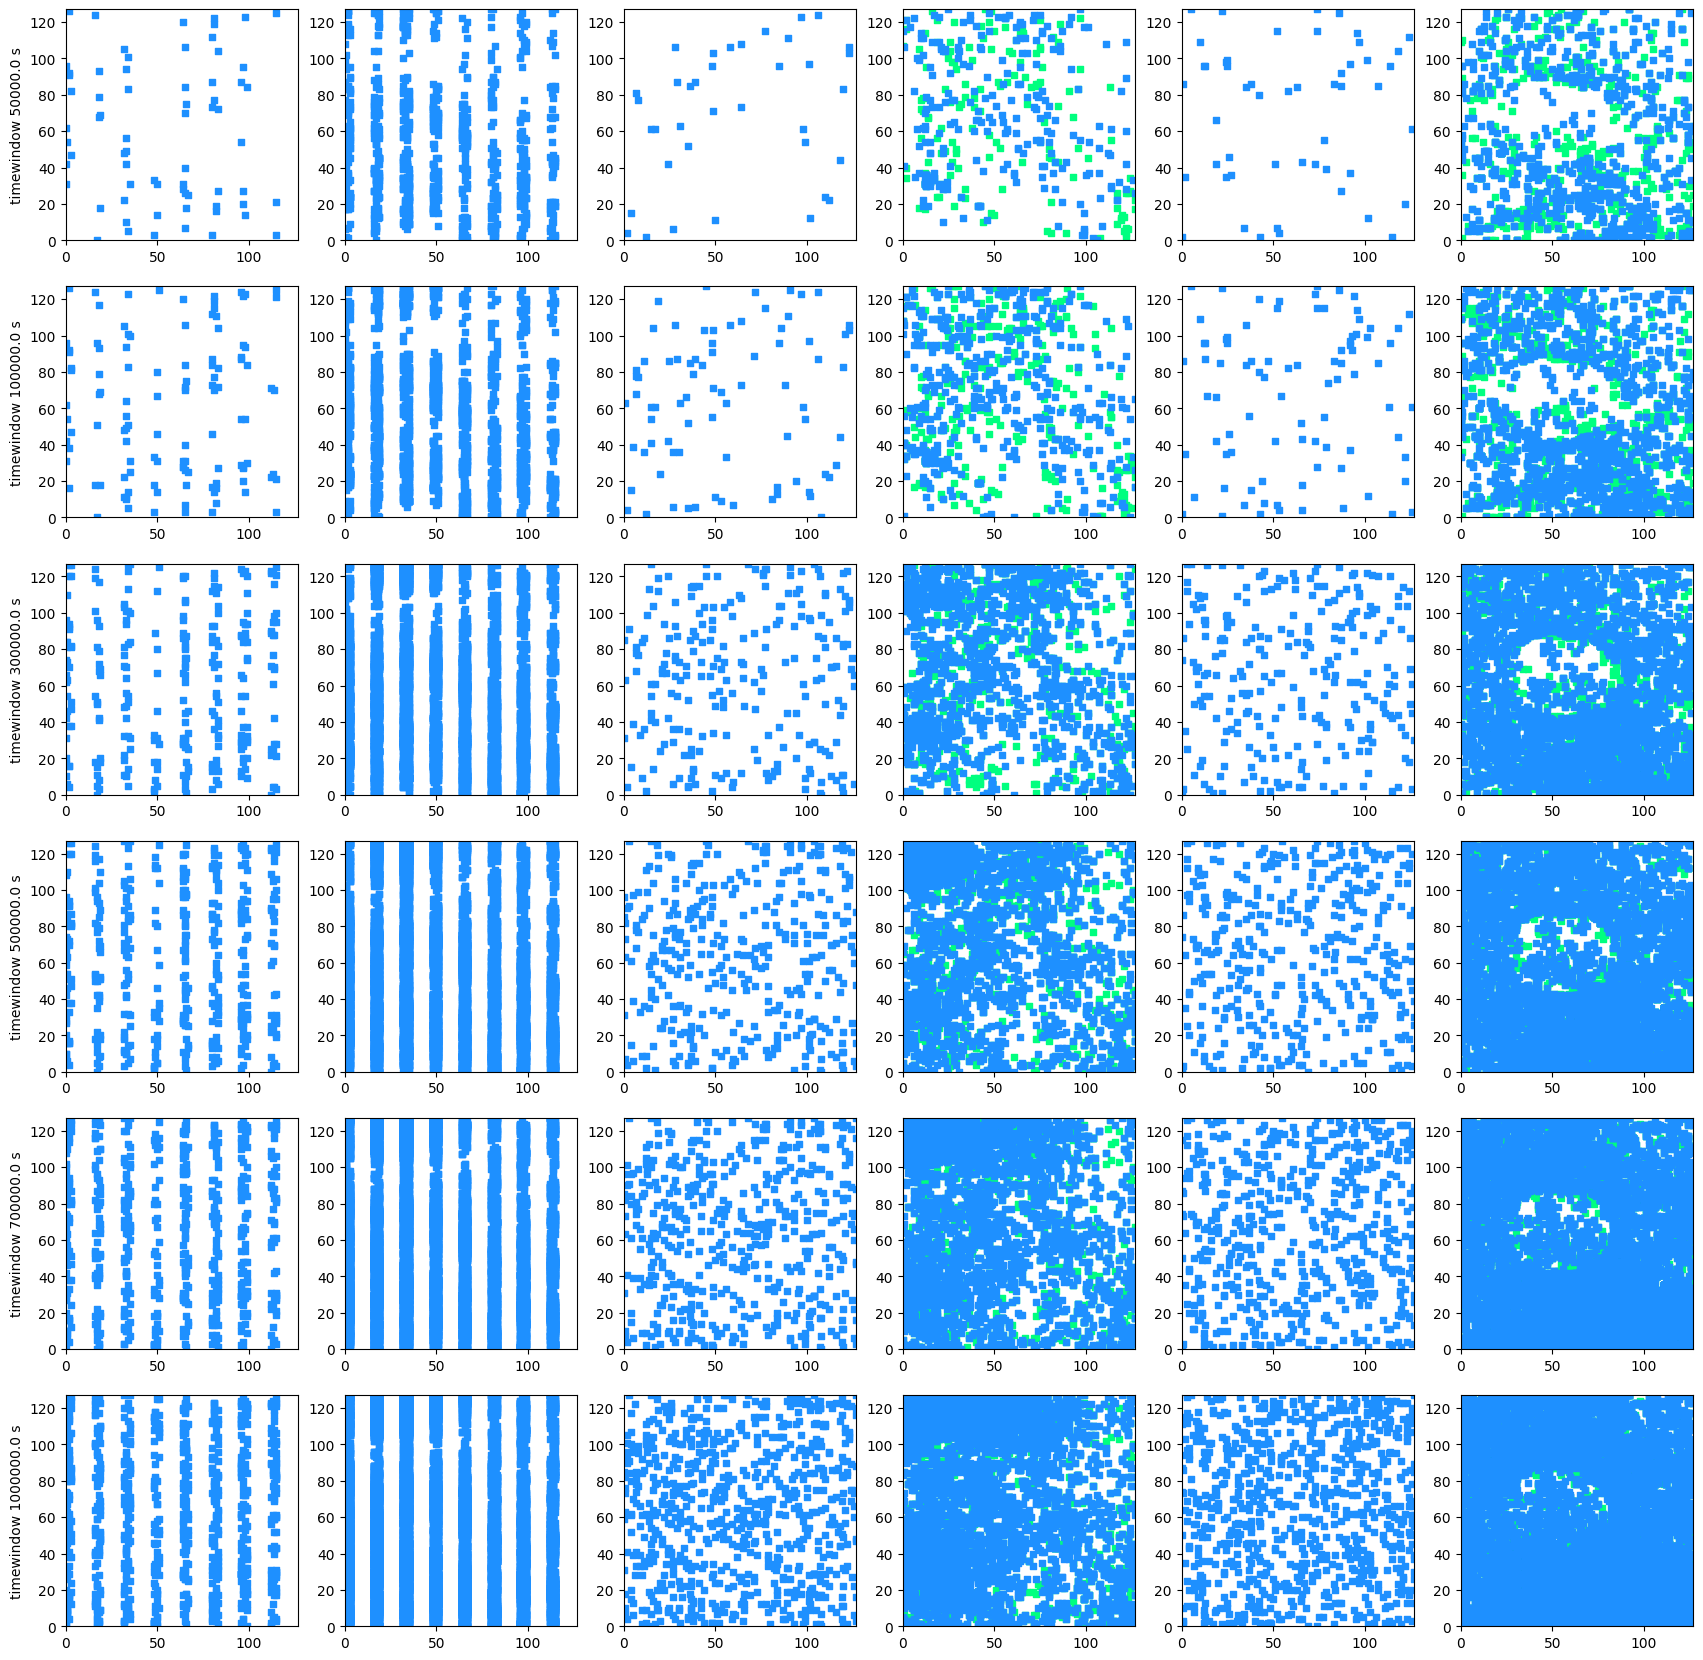

In [10]:
timewindow = [0.05,0.1,0.3,0.5,0.7,1]
timewindow = list(map(lambda x: 1e6*x, timewindow))

fig_events, ax = plt.subplots(len(timewindow),len(ev.keys()),figsize=(3*(len(ev.keys())+1),int(H*3/W)*(len(timewindow)+1)))
s = fig_events.get_size_inches()[0]  * fig_events.dpi / W

t = 0
for tw in timewindow:
     for ev_session, ev_data in ev.items():
          idx = int(ev_session[-1])-1
          ax[t][idx].set_xlim(0, W)
          ax[t][idx].set_ylim(0,H)

          positive_ev_in_tw = positive_ev[ev_session][positive_ev[ev_session][:,ordering.index('t')] < tw]
          negative_ev_in_tw = negative_ev[ev_session][negative_ev[ev_session][:,ordering.index('t')] < tw]
          scatter_pos_events = ax[t][idx].scatter(positive_ev_in_tw[:,ordering.index('x')], positive_ev_in_tw[:,ordering.index('y')], marker="s", color="springgreen", label="Positive events", s=s)
          scatter_neg_events = ax[t][idx].scatter(negative_ev_in_tw[:,ordering.index('x')], negative_ev_in_tw[:,ordering.index('y')], marker="s", color="dodgerblue", label="Negative events", s=s)
          
          if t == len(timewindow):
               ax[t][idx].set_xlabel(ev_session)
     
     ax[t][0].set_ylabel('timewindow '+str(tw)+' s')
     t += 1

## Visualise events with $y=0$ over time

Text(0.5, 0, 'Timestamps')

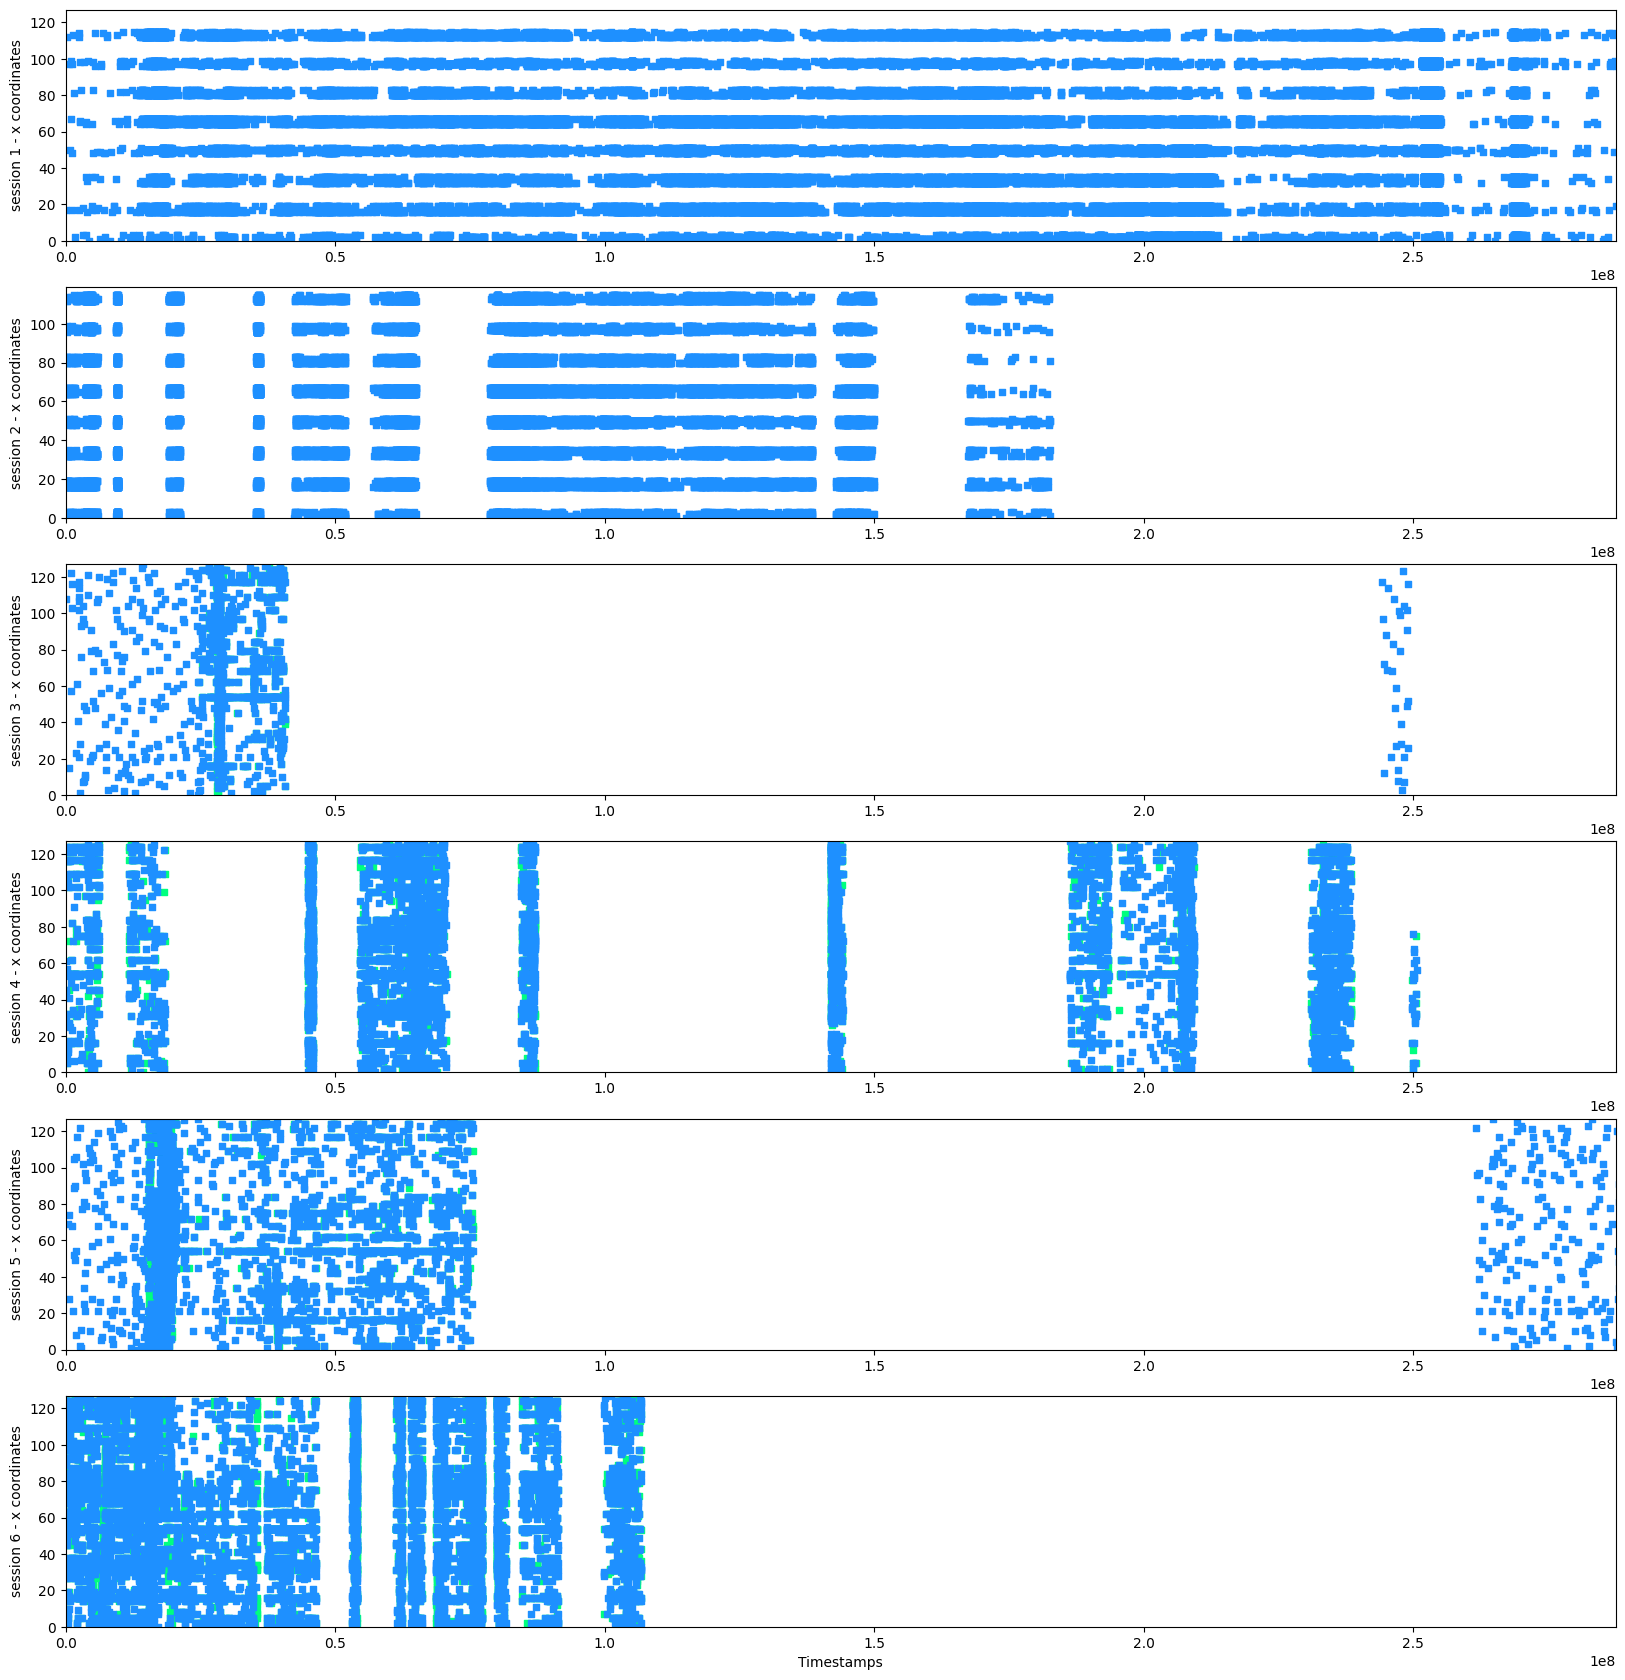

In [13]:
fig_events, ax = plt.subplots(len(ev.keys()),1,figsize=(20,3*(len(ev.keys())+1)))
s = fig_events.get_size_inches()[0]  * fig_events.dpi / W
for ev_session, ev_data in ev.items(): 
    idx = int(ev_session[-1])-1

    ax[idx].set_xlim(0, max_ts)
    ax[idx].set_ylim(0,max(ev_data[:,ordering.index('x')]))

    positive_ev = ev_data[ (ev_data[:,ordering.index('p')] > 0) & (ev_data[:,ordering.index('y')] == 0) ]
    negative_ev = ev_data[ (ev_data[:,ordering.index('p')] < 1) & (ev_data[:,ordering.index('y')] == 0) ]

    scatter_pos_events = ax[idx].scatter(positive_ev[:,ordering.index('t')], positive_ev[:,ordering.index('x')], marker="s", color="springgreen", label="Positive events", s=s)
    scatter_neg_events = ax[idx].scatter(negative_ev[:,ordering.index('t')], negative_ev[:,ordering.index('x')], marker="s", color="dodgerblue", label="Negative events", s=s)

    ax[idx].set_ylabel(ev_session + ' - x coordinates')
ax[-1].set_xlabel('Timestamps')

## Visualise events with $x=0$ over time

Text(0.5, 0, 'Timestamps')

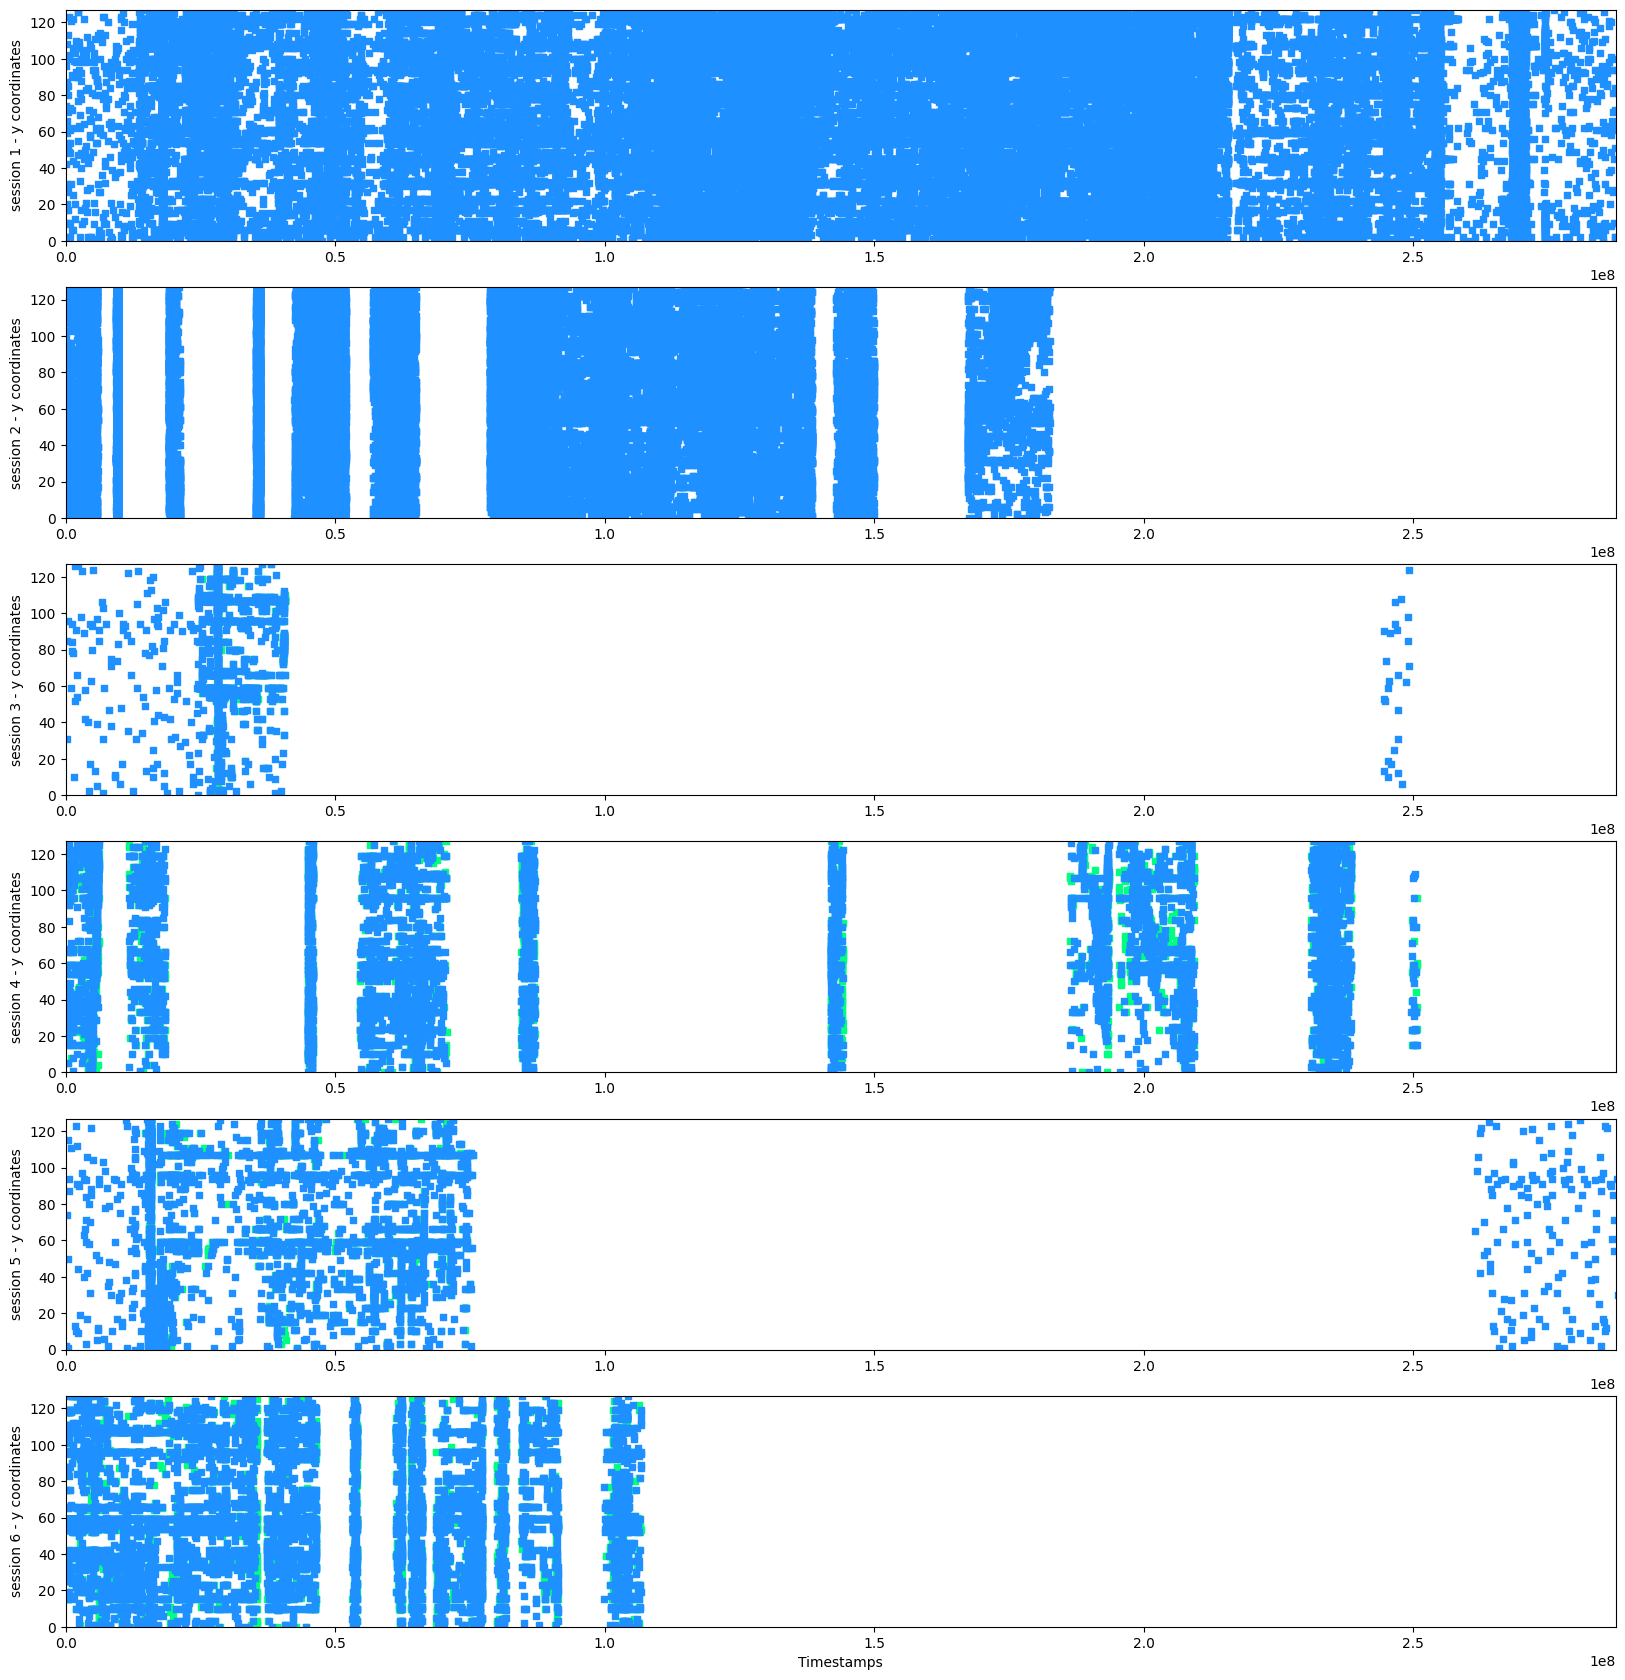

In [14]:
fig_events, ax = plt.subplots(len(ev.keys()),1,figsize=(20,3*(len(ev.keys())+1)))
s = fig_events.get_size_inches()[0]  * fig_events.dpi / W
for ev_session, ev_data in ev.items(): 
    idx = int(ev_session[-1])-1

    ax[idx].set_xlim(0, max_ts)
    ax[idx].set_ylim(0,max(ev_data[:,ordering.index('y')]))

    positive_ev = ev_data[ (ev_data[:,ordering.index('p')] > 0) & (ev_data[:,ordering.index('x')] == 0) ]
    negative_ev = ev_data[ (ev_data[:,ordering.index('p')] < 1) & (ev_data[:,ordering.index('x')] == 0) ]

    scatter_pos_events = ax[idx].scatter(positive_ev[:,ordering.index('t')], positive_ev[:,ordering.index('y')], marker="s", color="springgreen", label="Positive events", s=s)
    scatter_neg_events = ax[idx].scatter(negative_ev[:,ordering.index('t')], negative_ev[:,ordering.index('y')], marker="s", color="dodgerblue", label="Negative events", s=s)

    ax[idx].set_ylabel(ev_session + ' - y coordinates')
ax[-1].set_xlabel('Timestamps')

# Visualize event repartition on $x$ and $y$ coordinates

Text(0, 0.5, 'Number of events')

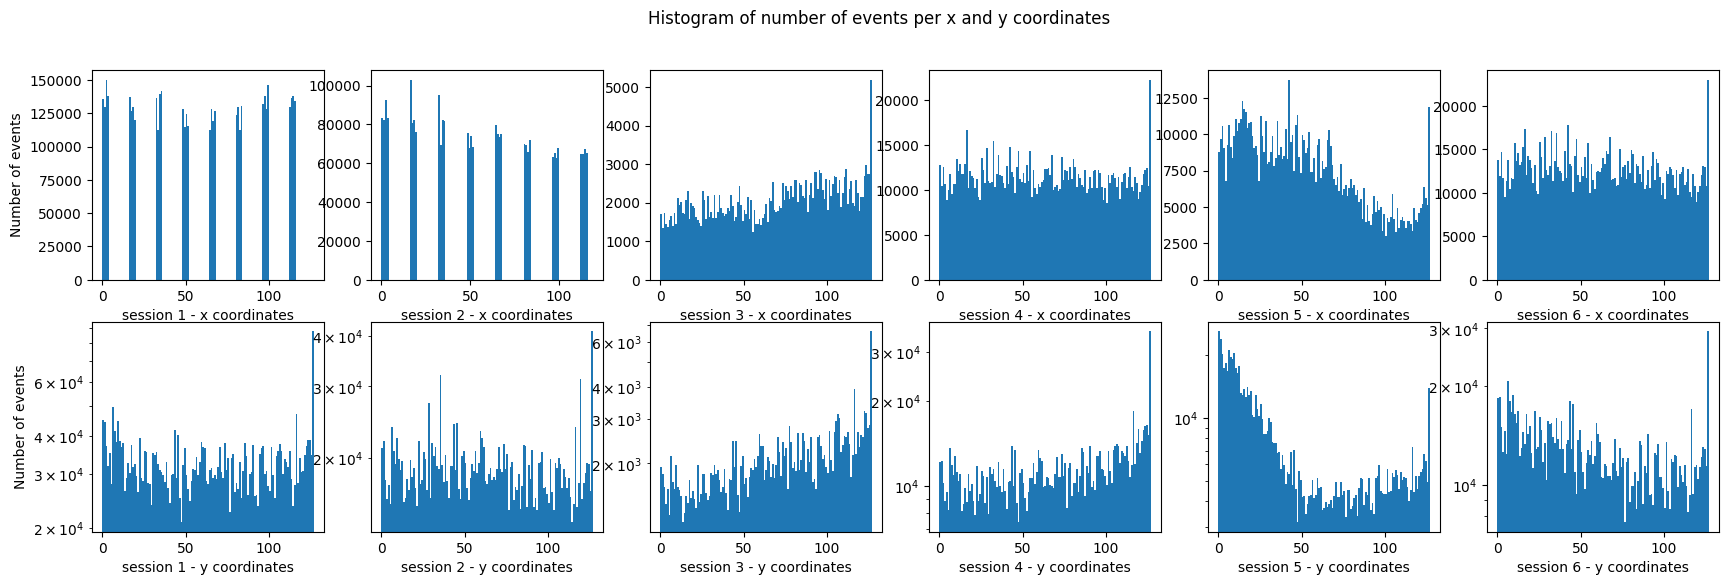

In [15]:
frame_bin=int(1e5)

fig_events, axes = plt.subplots(2,len(ev.keys()),figsize=(3*(len(ev.keys())+1),6))
fig_events.suptitle('Histogram of number of events per x and y coordinates')
s = fig_events.get_size_inches()[0]  * fig_events.dpi / W
for ev_session, ev_data in ev.items(): 
    idx = int(ev_session[-1])-1


    axes[0][idx].hist(ev_data[:, ordering.index('x')], bins=int(max(ev_data[:,ordering.index('x')])))

    axes[1][idx].hist(ev_data[:, ordering.index('y')], bins=int(max(ev_data[:,ordering.index('y')])))
    axes[1][idx].set_yscale('log')
    
    axes[0][idx].set_xlabel(ev_session+' - x coordinates')
    axes[1][idx].set_xlabel(ev_session+' - y coordinates')


axes[0][0].set_ylabel('Number of events')
axes[1][0].set_ylabel('Number of events')